In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt
from stellr import Optimizer
from corner import corner

In [62]:
path = 'population_results/test_50'
# path = 'stars_results/test'

# opt = Optimizer()
# opt.load_trace(os.path.join(path, 'trace'))
# opt.trace

In [63]:
stars = pd.read_csv(os.path.join(path, 'population/stars/results.csv'))
# stars = pd.read_csv(os.path.join(path, 'stars/results.csv'))

stars.head()

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hpd_3%,f_evol_hpd_97%,...,mhs_ess_mean,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd
0,83,1.052480,1.292578,1.486973,1026.443631,1084.880087,1084.880087,1296.755440,0.943807,1.584455,...,9752.618108,9370.835927,13834.634944,0.044514,0.305038,0.000702,0.000507,0.173243,1.001165,0.069345
1,53,0.634607,0.733796,0.815165,1598.179408,1576.494752,1576.494752,4352.108077,0.538245,0.891890,...,31711.875140,11914.380573,13644.819650,-0.185152,0.086618,0.000405,0.000468,-0.051084,1.000810,0.072182
2,70,1.846862,1.872027,1.904869,2784.698671,2931.161102,2913.826309,5804.284128,1.825723,1.926972,...,12302.243587,12106.845169,14460.167877,0.183535,0.433149,0.000598,0.000426,0.305176,1.000993,0.066337
3,45,0.468305,0.591134,0.689223,2151.071665,2143.603654,2143.603654,5484.981115,0.346692,0.793892,...,21024.574149,15961.835566,7214.603725,0.207126,0.458871,0.000468,0.000380,0.329719,1.000725,0.067885
4,44,0.430645,0.554202,0.659149,1689.324036,1662.508227,1662.508227,4084.827513,0.324634,0.759197,...,33507.983503,10566.157704,14571.596775,-0.164193,0.102216,0.000389,0.000490,-0.027661,1.000490,0.071199


In [64]:
outputs = pd.read_csv('../../data/tracks/test_stars/test_stars_outputs.csv')
outputs.head()

,index,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,frac_evol,age_weights
0,0,1.0,0.85397,0.25364,0.014426,0.03700,2.00798,0.85397,7.046015,0.398266,5200.535430,0.445522,0.823374,4.538138,0.228446,0.013172,-0.017916,167.944271,0.398266,0.199418
1,1,1.0,0.85854,0.27288,0.017527,0.13517,1.84533,0.85854,7.349840,0.435597,5169.130768,0.460919,0.847689,4.515177,0.244816,0.015969,0.076846,161.360379,0.435597,0.196443
2,2,1.0,0.86302,0.29363,0.028322,0.36335,1.99334,0.86302,3.216747,0.174959,4893.183014,0.323551,0.792587,4.575816,0.282007,0.027385,0.340614,178.462162,0.174959,0.033333
3,3,1.0,0.86445,0.27088,0.012056,-0.03175,1.89884,0.86445,5.086326,0.372984,5427.143855,0.555922,0.844546,4.521383,0.246552,0.011104,-0.082774,162.451236,0.372984,0.126204
4,4,1.0,0.86455,0.28837,0.018435,0.16724,1.90678,0.86455,7.930125,0.528107,5297.480060,0.542283,0.875454,4.490213,0.255423,0.016633,0.101207,154.279390,0.528107,0.179025


In [65]:
rename_cols = {
    'index': 'name',
    'frac_evol': 'f_evol_true',
    'initial_mass': 'mass_true',
    'initial_MLT': 'mlt_true',
    'initial_Yinit': 'yi_true',
    'initial_Zinit': 'zi_true',
    'initial_feh': 'mhi_true',
    'star_age': 'age_true',
    'effective_T': 'teff_true',
    'radius': 'rad_true',
    'luminosity': 'lum_true',
    'delta_nu_fit': 'dnu_true',
    'star_feh': 'mhs_true',
}

truths = outputs.loc[:, rename_cols.keys()].rename(columns=rename_cols)
truths.head()

,name,f_evol_true,mass_true,mlt_true,yi_true,zi_true,mhi_true,age_true,teff_true,rad_true,lum_true,dnu_true,mhs_true
0,0,0.398266,0.85397,2.00798,0.25364,0.014426,0.03700,7.046015,5200.535430,0.823374,0.445522,167.944271,-0.017916
1,1,0.435597,0.85854,1.84533,0.27288,0.017527,0.13517,7.349840,5169.130768,0.847689,0.460919,161.360379,0.076846
2,2,0.174959,0.86302,1.99334,0.29363,0.028322,0.36335,3.216747,4893.183014,0.792587,0.323551,178.462162,0.340614
3,3,0.372984,0.86445,1.89884,0.27088,0.012056,-0.03175,5.086326,5427.143855,0.844546,0.555922,162.451236,-0.082774
4,4,0.528107,0.86455,1.90678,0.28837,0.018435,0.16724,7.930125,5297.480060,0.875454,0.542283,154.279390,0.101207


In [66]:
obs = pd.read_csv('../../data/tracks/test_stars/test_stars_obs.csv')
obs = obs.rename(columns={'index': 'name'})
obs.head()

,name,teff,lum,mhs,logg,dnu,teff_err,lum_err,mhs_err,logg_err,dnu_err
0,0,5509.868287,0.455461,0.048007,4.548031,168.551764,114.277805,0.015823,0.072604,0.019638,0.933
1,1,5132.860162,0.447037,0.120842,4.475545,162.050913,113.587711,0.016370,0.072604,0.019638,0.933
2,2,4950.043140,0.316783,0.354314,4.560913,177.591451,107.523969,0.011491,0.072604,0.019638,0.933
3,3,5541.041366,0.559689,0.060892,4.572558,163.088949,119.257352,0.019744,0.072604,0.019638,0.933
4,4,5332.712767,0.574903,-0.022662,4.467451,154.153583,116.408089,0.019259,0.072604,0.019638,0.933


In [67]:
comp = truths.merge(obs.merge(stars, on='name'), on='name')
comp.head()

,name,f_evol_true,mass_true,mlt_true,yi_true,zi_true,mhi_true,age_true,teff_true,rad_true,...,mhs_ess_mean,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd
0,0,0.398266,0.85397,2.00798,0.25364,0.014426,0.03700,7.046015,5200.535430,0.823374,...,30975.487652,14383.199654,15290.139559,-0.088763,0.170605,0.000390,0.000405,0.042864,1.000678,0.068687
1,4,0.528107,0.86455,1.90678,0.28837,0.018435,0.16724,7.930125,5297.480060,0.875454,...,36061.088597,8650.041295,14244.452705,-0.131732,0.137526,0.000377,0.000544,0.001162,1.000835,0.071609
2,5,0.601019,0.86533,2.08912,0.28331,0.017155,0.13209,8.857280,5400.370100,0.883486,...,39345.735082,18933.620833,15141.346299,-0.052162,0.220642,0.000365,0.000372,0.084648,1.001342,0.072485
3,7,0.720317,0.87403,1.86476,0.29844,0.018305,0.17052,9.516969,5434.607449,0.956651,...,37979.219953,26269.733956,11829.322682,0.093221,0.360553,0.000364,0.000310,0.229023,1.001278,0.071027
4,9,0.315266,0.87813,2.03850,0.30062,0.029701,0.38936,5.267082,5029.101830,0.824801,...,16413.272113,14232.282458,7537.987555,0.278201,0.496859,0.000471,0.000357,0.391316,1.000471,0.060312


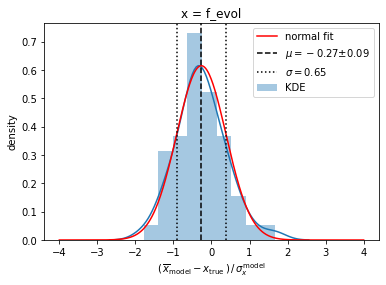

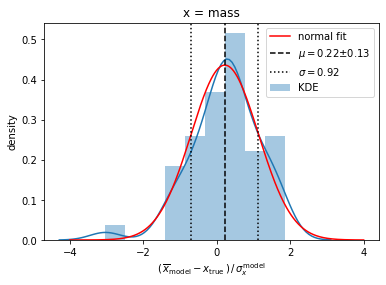

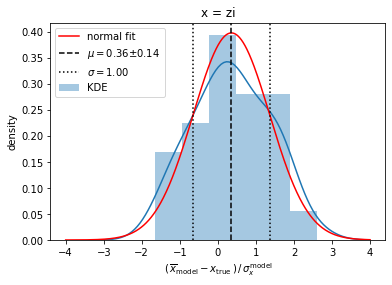

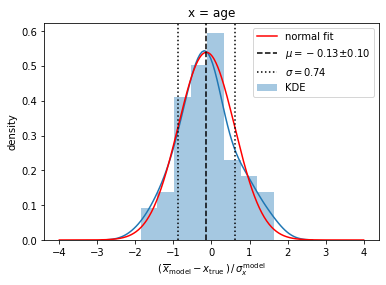

In [68]:
p_mle = {}
p_res = {}
theta = ['f_evol', 'mass', 'zi', 'age']
x = np.linspace(-4, 4, 500)
n_stars = len(comp)

for param in theta:
    p_res[param] = ((comp[f'{param}_mean'] - comp[f'{param}_true']) / comp[f'{param}_sd'])
    p_mle[param] = stats.norm.fit(p_res[param])

for param in theta:
    mle = p_mle[param]
    pdf = stats.norm.pdf(x, *mle)
    bin_freq, bin_edges = np.histogram(p_res[param], bins=10, range=(-4, 4))
    bin_width = np.diff(bin_edges)
    bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
    s = np.sum(bin_freq * bin_width)
    y = bin_freq / s
    y_err = (bin_freq**0.5) / s
    
    plt.figure()
#     plt.errorbar(bin_centers, y, 
#                  yerr=y_err, 
#                  marker = '.',
#                  drawstyle='steps-mid',
#                  label='bin centers')
#     plt.hist(p_res[param], density=True, alpha=0.5, bins=20, range=(-4, 4), label='model results')

    sns.distplot(p_res[param], label='KDE')
    se = mle[1] / np.sqrt(n_stars)
    plt.plot(x, pdf, 'r', label='normal fit')

    plt.axvline(mle[0], color='k', linestyle='--', label=r'$\mu='+f'{mle[0]:.2f}±{se:.2f}'+'$')
    plt.axvline(mle[0]+mle[1], color='k', linestyle=':', label=r'$\sigma='+f'{mle[1]:.2f}'+'$')
    plt.axvline(mle[0]-mle[1], color='k', linestyle=':')
#     plt.hlines(0.5*max(pdf), mle[0]-mle[1], mle[0]+mle[1], color='k')
#     plt.axvspan(mle[0]-mle[1], mle[0]+mle[1], color='grey', alpha=0.3, label=r'$\sigma='+f'{mle[1]:.2f}'+'$')
    plt.title(f'x = {param}')
    plt.xlabel(r'$(\,\overline{x}_\mathrm{model} - x_\mathrm{true}\,)\,/\,                 \sigma_x^\mathrm{model}$')
    plt.ylabel('density')
    plt.legend()

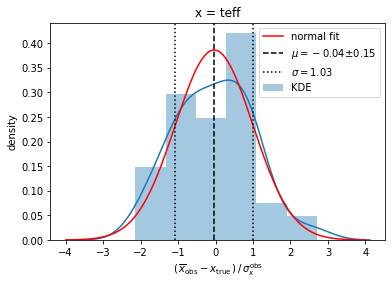

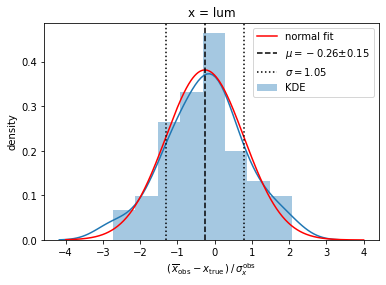

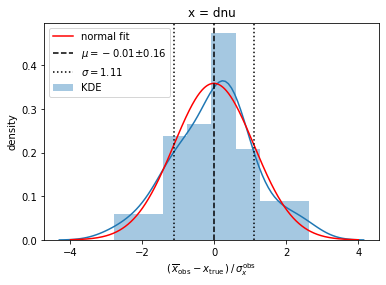

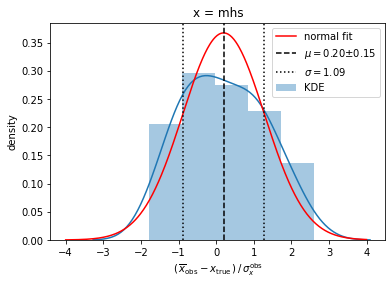

In [69]:
p_mle = {}
p_res = {}
theta = ['teff', 'lum', 'dnu', 'mhs']
x = np.linspace(-4, 4, 500)
n_stars = len(comp)

for param in theta:
    p_res[param] = ((comp[f'{param}'] - comp[f'{param}_true']) / comp[f'{param}_err'])
    p_mle[param] = stats.norm.fit(p_res[param])

for param in theta:
    mle = p_mle[param]
    pdf = stats.norm.pdf(x, *mle)
    bin_freq, bin_edges = np.histogram(p_res[param], bins=10, range=(-4, 4))
    bin_width = np.diff(bin_edges)
    bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
    s = np.sum(bin_freq * bin_width)
    y = bin_freq / s
    y_err = (bin_freq**0.5) / s
    
    plt.figure()
#     plt.errorbar(bin_centers, y, 
#                  yerr=y_err, 
#                  marker = '.',
#                  drawstyle='steps-mid',
#                  label='bin centers')
#     plt.hist(p_res[param], density=True, alpha=0.5, bins=20, range=(-4, 4), label='model results')

    sns.distplot(p_res[param], label='KDE')
    se = mle[1] / np.sqrt(n_stars)
    plt.plot(x, pdf, 'r', label='normal fit')

    plt.axvline(mle[0], color='k', linestyle='--', label=r'$\mu='+f'{mle[0]:.2f}±{se:.2f}'+'$')
    plt.axvline(mle[0]+mle[1], color='k', linestyle=':', label=r'$\sigma='+f'{mle[1]:.2f}'+'$')
    plt.axvline(mle[0]-mle[1], color='k', linestyle=':')
#     plt.hlines(0.5*max(pdf), mle[0]-mle[1], mle[0]+mle[1], color='k')
#     plt.axvspan(mle[0]-mle[1], mle[0]+mle[1], color='grey', alpha=0.3, label=r'$\sigma='+f'{mle[1]:.2f}'+'$')
    plt.title(f'x = {param}')
    plt.xlabel(r'$(\,\overline{x}_\mathrm{obs} - x_\mathrm{true}\,)\,/\,\sigma_x^\mathrm{obs}$')
    plt.ylabel('density')
    plt.legend()

In [12]:
pop = pd.read_csv(os.path.join(path, 'population/results.csv'))
pop.head()

,dydz_16th,dydz_50th,dydz_84th,dydz_ess_bulk,dydz_ess_mean,dydz_ess_sd,dydz_ess_tail,dydz_hpd_3%,dydz_hpd_97%,dydz_mcse_mean,...,sigma_mlt_ess_mean,sigma_mlt_ess_sd,sigma_mlt_ess_tail,sigma_mlt_hpd_3%,sigma_mlt_hpd_97%,sigma_mlt_mcse_mean,sigma_mlt_mcse_sd,sigma_mlt_mean,sigma_mlt_r_hat,sigma_mlt_sd
0,1.08932,1.747242,2.527642,1047.933481,1015.130884,975.28689,1893.398016,0.496456,3.162879,0.022406,...,2987.93231,2703.146787,3516.351237,0.004083,0.209565,0.001222,0.000908,0.087685,1.002513,0.066784


In [13]:
hyperparams = pd.read_csv('../../data/tracks/test_stars/test_stars_hyperparams.csv', names=['true'], index_col=0)
hyperparams

,true
dydz,1.8000
yp,0.2467
sigma_yi,0.0080
mu_mlt,2.0000
sigma_mlt,0.0800
m_zi,0.0160
sigma_zi,0.3000


In [50]:
posterior = opt.trace.posterior

In [104]:
phi = ['dydz', 'yp', 'sigma_yi', 'mu_mlt', 'sigma_mlt']

In [70]:
var_names = [f'population/{ph}' for ph in phi]

In [94]:
xs = posterior[var_names].to_array().values
xs.shape

(5, 10, 2000)

In [95]:
xs = xs.reshape((xs.shape[0], np.prod(xs.shape[1:]))).T
xs.shape

(20000, 5)

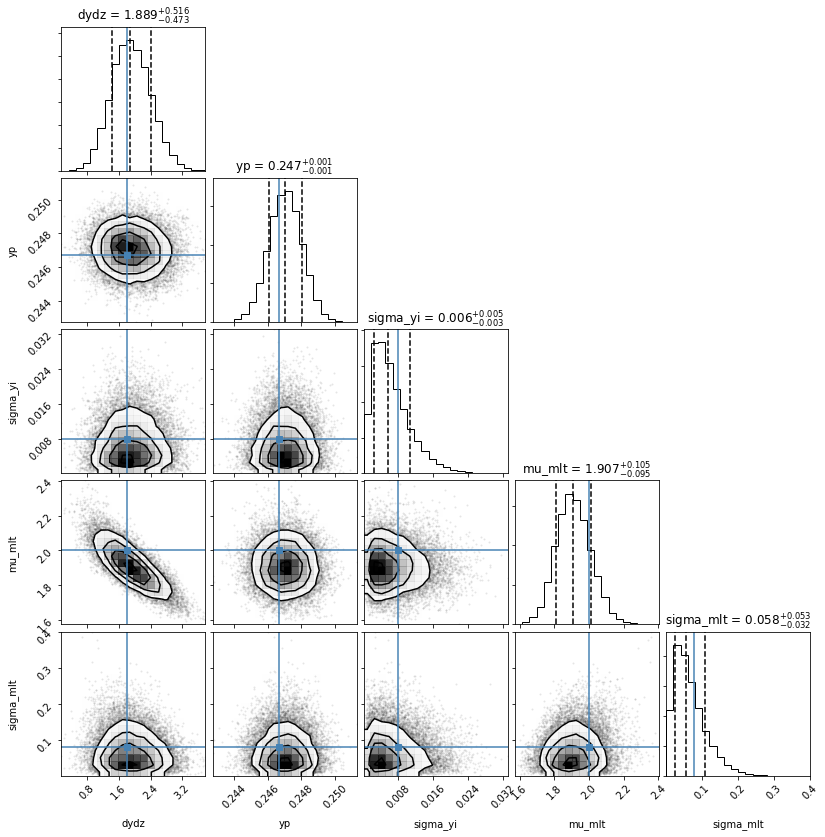

In [103]:
fig = corner(
    xs, truths=hyperparams.loc[phi, 'true'], quantiles=[.16, .5, .84],
    labels=phi, show_titles=True, title_fmt='.3f'
)